In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns
from sklearn import  metrics
from sklearn import preprocessing
from pandas import read_csv, set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv('train.csv')

Find the datatypes of the columns in pandas

In [ ]:
data['income_level'].dtypes

In [18]:
data[data['income_level']==+50000].count()

age                                 12382
class_of_worker                     12382
industry_code                       12382
occupation_code                     12382
education                           12382
wage_per_hour                       12382
enrolled_in_edu_inst_lastwk         12382
marital_status                      12382
major_industry_code                 12382
major_occupation_code               12382
race                                12382
hispanic_origin                     12325
sex                                 12382
member_of_labor_union               12382
reason_for_unemployment             12382
full_parttime_employment_stat       12382
capital_gains                       12382
capital_losses                      12382
dividend_from_Stocks                12382
tax_filer_status                    12382
region_of_previous_residence        12382
state_of_previous_residence         12337
d_household_family_stat             12382
d_household_summary               

In [3]:
labels = data.iloc[:,-1]

In [4]:
labels[labels == -50000] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
labels[labels == +50000] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
labels[labels == 1].count()

12382

In [7]:
labels[labels == 0].count()

187141

In [31]:
print('0 count',(labels[labels == 0].count()/labels.count())*100)

0 count 93.79419916500854


In [32]:
print('1 count',(labels[labels == 1].count()/labels.count())*100)

1 count 6.205800834991455


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


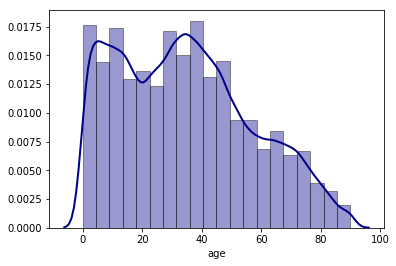

In [38]:
sns.distplot(data['age'], hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

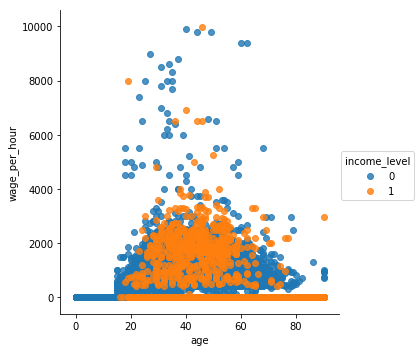

In [39]:
sns.lmplot(x='age', y='wage_per_hour', data=data,
           fit_reg=False, # No regression line
           hue='income_level') 

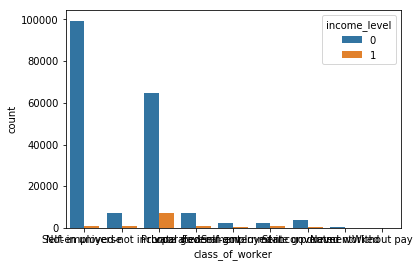

In [41]:
sns.countplot(x = 'class_of_worker', hue='income_level', data=data )

In [42]:
data.class_of_worker.unique()

array(['Not in universe', 'Self-employed-not incorporated', 'Private',
       'Local government', 'Federal government',
       'Self-employed-incorporated', 'State government', 'Never worked',
       'Without pay'], dtype=object)

In [43]:
data.isnull().values.any()

True

To find any empty values in the pandas

In [58]:
data.isna().any()

age                                 False
class_of_worker                     False
industry_code                       False
occupation_code                     False
education                           False
wage_per_hour                       False
enrolled_in_edu_inst_lastwk         False
marital_status                      False
major_industry_code                 False
major_occupation_code               False
race                                False
hispanic_origin                      True
sex                                 False
member_of_labor_union               False
reason_for_unemployment             False
full_parttime_employment_stat       False
capital_gains                       False
capital_losses                      False
dividend_from_Stocks                False
tax_filer_status                    False
region_of_previous_residence        False
state_of_previous_residence          True
d_household_family_stat             False
d_household_summary               

Various types for converting categorical features into labels

In [8]:
categorical = ['education', 'class_of_worker','marital_status', 'race','sex' ]

In [63]:
data.marital_status.unique()

array(['Widowed', 'Divorced', 'Never married',
       'Married-civilian spouse present', 'Separated',
       'Married-spouse absent', 'Married-A F spouse present'],
      dtype=object)

In [11]:
new_data = data[categorical].apply(LabelEncoder().fit_transform)

In [52]:
data['education'] = data['education'].cat.codes

In [71]:
new_data.head()

,education,class_of_worker,marital_status,race,sex
0,12,3,6,4,0
1,16,6,0,4,1
2,0,3,4,1,0
3,10,3,4,4,0
4,10,3,4,4,0


In [10]:
from sklearn.preprocessing import LabelEncoder
l_encode = LabelEncoder()
from sklearn.feature_selection import RFE


In [12]:
y = labels.values
X = new_data.values

In [13]:
logreg = LogisticRegression()
rfe = RFE(logreg, 3)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False  True]
[3 1 1 2 1]


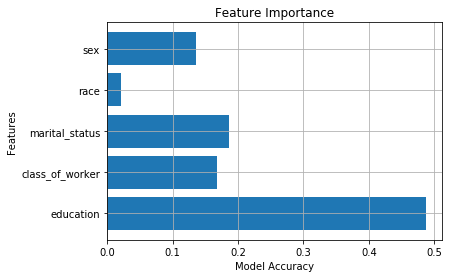

In [14]:
# fit an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(new_data, y)

# display the relative importance of each attribute
relval = extree.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(5) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, ('education', 'class_of_worker','marital_status', 'race','sex'))
plt.grid(True)

In [27]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size = 0.2, random_state = seed)
from sklearn.linear_model import LinearRegression

In [16]:
num_folds = 10
seed = 7
RMS = 'neg_mean_squared_error'

In [17]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

In [87]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=RMS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.054986 (0.001425)
LASSO: -0.058310 (0.001625)
EN: -0.058310 (0.001625)
KNN: -0.052184 (0.002315)
CART: -0.044875 (0.001015)


In [ ]:
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('K Nearest Neighbors', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('SVM Linear Kernel', SVC(kernel = 'linear')))
models.append(('SVM Rbf Kernel', SVC()))

In [ ]:
classifiers = [
    knnc(),
    dtc(),
    SVC(),
    SVC(kernel='linear'),
    gnb()
]
classifier_names = [
    'K nearest neighbors',
    'Decision Tree Classifier',
    'SVM classifier with RBF kernel',
    'SVM classifier with linear kernel',
    'Gaussian Naive Bayes'
]

In [ ]:
for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, X_train, Y_train, cv=10)
    
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

In [18]:
from sklearn import linear_model as lm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix


In [33]:
classifiers = [
    knnc(),
    dtc(),
    SVC(),
    SVC(kernel='linear'),
    gnb()
]
classifier_names = [
    'K nearest neighbors',
    'Decision Tree Classifier',
    'SVM classifier with RBF kernel',
    'SVM classifier with linear kernel',
    'Gaussian Naive Bayes'
]

In [34]:
for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, X_train, Y_train, cv=10)
    
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

K nearest neighbors  mean accuracy:  93.884 % std:  0.0 %
Decision Tree Classifier  mean accuracy:  94.278 % std:  0.0 %
SVM classifier with RBF kernel  mean accuracy:  94.277 % std:  0.0 %
SVM classifier with linear kernel  mean accuracy:  93.863 % std:  0.0 %
Gaussian Naive Bayes  mean accuracy:  91.829 % std:  0.0 %
